# Bank Marketing Data Analysis (EDA)

## Project Overview
This project performs exploratory data analysis on a bank marketing dataset
to understand customer behavior and identify factors influencing term deposit subscriptions.






## Methodology

The analysis follows a question-driven exploratory data analysis approach:
- Understanding target variable distribution
- Analyzing customer demographics and behavior
- Visualizing relationships between key features and subscription outcomes
- Extracting actionable business insights


## Business Objective

The goal of this analysis is to understand which customer segments are more likely
to subscribe to a term deposit and identify key factors that influence the success
of bank marketing campaigns.



## Business Questions Addressed

1. What proportion of customers subscribe to a term deposit?
2. Does customer age influence subscription behavior?
3. Do certain job categories respond better to campaigns?
4. How does call duration impact conversion?
5. Does increasing the number of contact attempts improve success?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


In [4]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

In [4]:
df.shape

(41188, 21)

### Data Overview
The dataset contains customer, campaign, and economic information related to bank term deposit subscriptions.
Initial exploration helps understand data size, structure, and potential data quality issues.


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Business Questions

The following questions guide the exploratory data analysis and focus on
understanding customer behavior and campaign effectiveness.


###Q1: What proportion of customers subscribe to a term deposit?

####Description
Understanding the overall subscription rate helps evaluate how effective the bank’s marketing campaigns are and highlights whether better customer targeting is required.

In [5]:
# Absolute counts
df['y'].value_counts()


,count
y,
no,36548
yes,4640


In [6]:
# Percentage distribution

df['y'].value_counts(normalize=True) * 100


,proportion
y,
no,88.734583
yes,11.265417


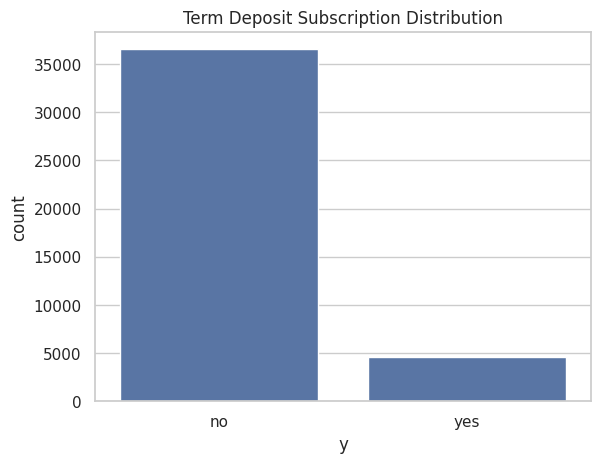

In [12]:
# Visualization

sns.countplot(x='y', data=df)
plt.title("Term Deposit Subscription Distribution")
plt.show()


####Insight
Only around 11% of customers subscribed to a term deposit, indicating a low overall conversion rate. This suggests that current marketing campaigns are not well targeted and can be improved through better customer segmentation.

###Q2: Does customer age influence term deposit subscription?

####Description
Analyzing age distribution helps identify whether certain age groups are more responsive to term deposit offers, which can guide age-focused marketing strategies.

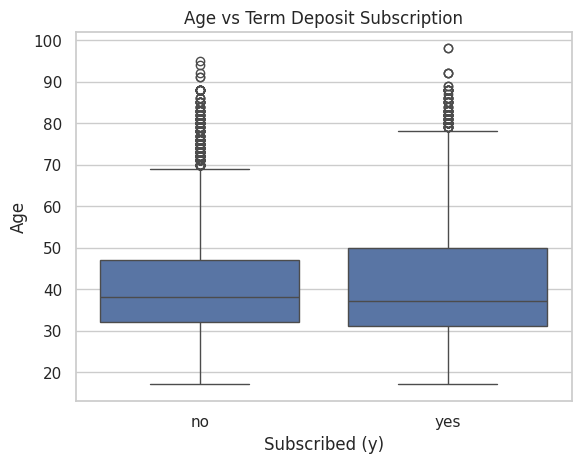

In [8]:
sns.boxplot(x='y', y='age', data=df)
plt.title("Age vs Term Deposit Subscription")
plt.xlabel("Subscribed (y)")
plt.ylabel("Age")
plt.show()



####Insight

Customers who subscribed to term deposits tend to be slightly older than those who did not. This indicates that age plays a role in subscription behavior, with middle-aged and older customers being more responsive.


###Q3: Do certain job categories respond better to campaigns?
####Description

Different professions may have different financial goals and risk preferences. Understanding subscription behavior by job category helps identify high-potential customer segments.

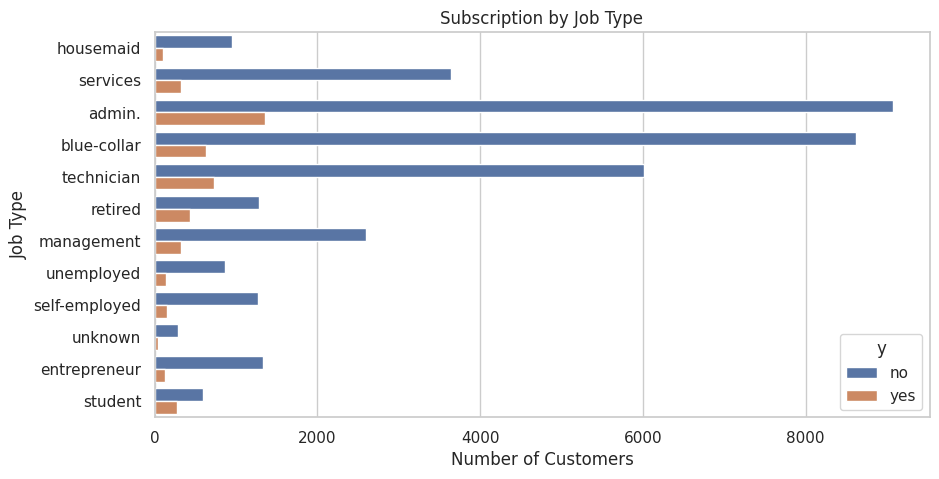

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y='job', hue='y', data=df)
plt.title("Subscription by Job Type")
plt.xlabel("Number of Customers")
plt.ylabel("Job Type")
plt.show()


**Job-wise Subscription Rate (Percentage)**

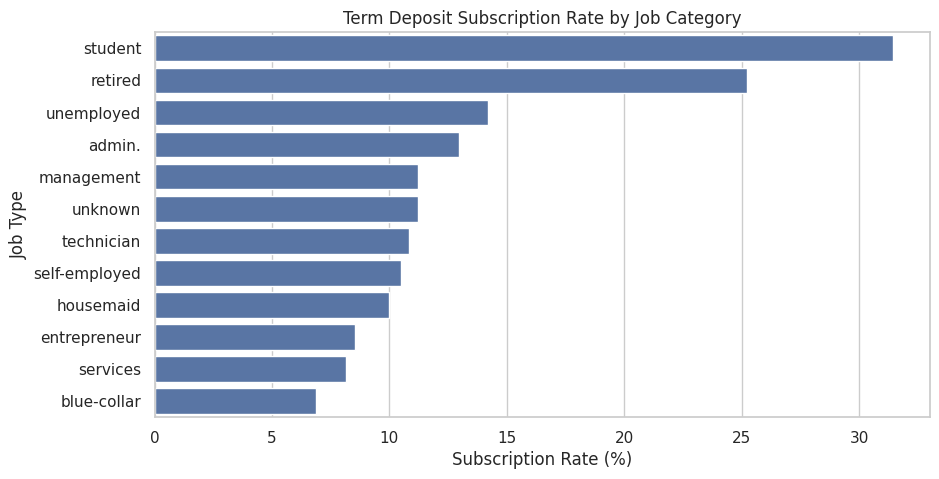

In [13]:
# Calculate subscription rate (%) by job
job_subscription_rate = (
    df.groupby('job')['y']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(
    x=job_subscription_rate.values,
    y=job_subscription_rate.index
)
plt.xlabel("Subscription Rate (%)")
plt.ylabel("Job Type")
plt.title("Term Deposit Subscription Rate by Job Category")
plt.show()


####Insight

Retired and student customers exhibit significantly higher subscription rates compared to other job categories, exceeding the overall average conversion rate of ~11%. This indicates that although these groups are smaller in size, they represent high-quality leads and should be prioritized in targeted marketing campaigns.


###Q4: How does call duration impact subscription success?
####Description

Call duration reflects customer engagement during marketing calls. Analyzing its relationship with subscription outcomes helps assess the importance of meaningful interactions.

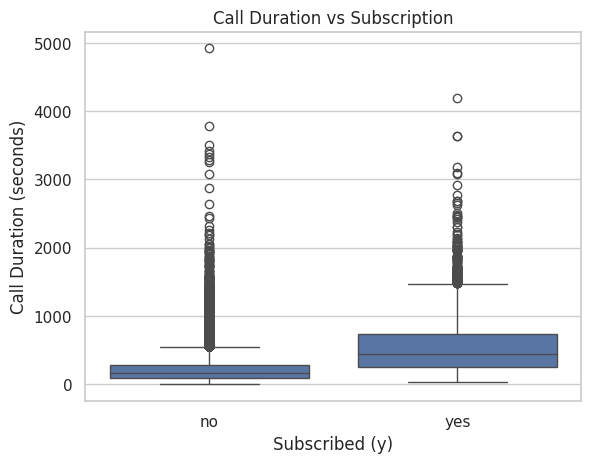

In [10]:
sns.boxplot(x='y', y='duration', data=df)
plt.title("Call Duration vs Subscription")
plt.xlabel("Subscribed (y)")
plt.ylabel("Call Duration (seconds)")
plt.show()



####Insight

Customers who subscribed generally had longer call durations compared to those who did not. This suggests that more engaging and informative conversations significantly increase conversion likelihood.


###Q5: Does the number of contact attempts affect campaign success?
####Description

Repeated contact attempts may either increase familiarity or cause customer fatigue. This analysis helps determine the optimal number of follow-ups.

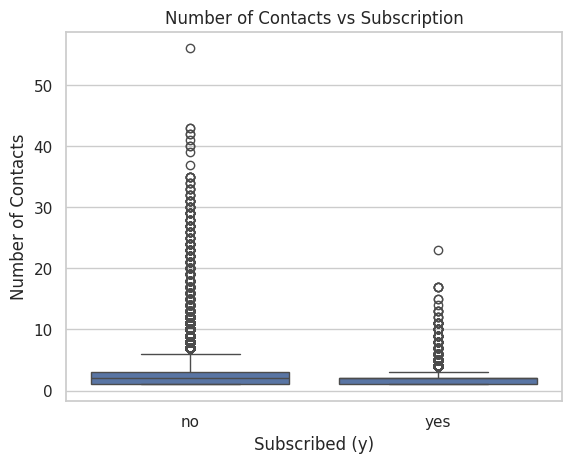

In [11]:
sns.boxplot(x='y', y='campaign', data=df)
plt.title("Number of Contacts vs Subscription")
plt.xlabel("Subscribed (y)")
plt.ylabel("Number of Contacts")
plt.show()


####Insight

Successful subscriptions typically occur with fewer contact attempts. Excessive follow-ups do not improve conversion rates and may reduce campaign effectiveness.


## **Key Findings**
- The overall term deposit subscription rate is low (~11%), indicating inefficient mass targeting.
- Middle-aged and older customers show higher likelihood of subscribing.
- Retired and student customers have higher subscription rates within their segments.
- Longer call durations are strongly associated with successful subscriptions.
- Fewer contact attempts yield better outcomes; excessive follow-ups reduce effectiveness.



## **Business Recommendations**


*   Focus marketing efforts on high-response customer segments such as retired and student groups rather than mass targeting.


*   Prioritize quality of interaction over quantity, aiming for meaningful conversations instead of repeated follow-ups.


*   Optimize call strategies by targeting appropriate call durations, as longer, well-structured conversations improve conversion rates.

*   Use demographic and behavioral insights (age, job, engagement level) to design more personalized and efficient marketing campaigns.




### **Conclusion**

This exploratory data analysis demonstrates how customer demographics, engagement metrics, and campaign strategies directly influence term deposit subscription outcomes. By leveraging data-driven insights, banks can improve campaign effectiveness, reduce operational costs, and increase overall conversion rates.